# Manipulation of CMIP6 model data using Pangeo catalog

## Import python packages

In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

## Reading file from bucket

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", 
                       secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", 
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022')

['escience2022/Ada',
 'escience2022/Antoine',
 'escience2022/Dominic',
 'escience2022/ESA_SMOS_sss',
 'escience2022/Remy',
 'escience2022/Sara',
 'escience2022/Zhihong']

In [3]:
#s3path = "s3://escience2022/Zhihong/o3_AERmon_GISS-E2-1-G_historical_r1i1p3f1_gn_185001-190012.nc"
# Using cb_O3 because it is cummulative ozone without the levels
s3path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_O3.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [4]:
do = xr.open_dataset(s3.open(s3path))
do

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, lev: 32, ilev: 33, time: 540, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time       (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 ...
    hybm       (lev) float64 ...
    P0         float64 ...
    hyai       (ilev) float64 ...
    hybi       (ilev) float64 ...
    date       (time) int32 ...
    time_bnds  (time, nbnd) object ...
    PS         (time, lat, lon) float32 ...
    cb_O3      (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14
    logname:           olivie
    host:              
    initial_file:      NHISTfrc2_f09_tn14_20191025.cam.i.1970-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Oct 28 00:03:32 2022: ncrcat /scratch/olivie/cmip6...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

### Get metadata corresponding to near-surface air temperature (tas)

In [36]:
print(do['cb_O3'])

<xarray.DataArray 'cb_O3' (time: 540, lat: 192, lon: 288)>
[29859840 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    units:         kg/m2
    long_name:     cb_O3 in column
    cell_methods:  time: mean


In [5]:
do.time.values;

In [6]:
#Converting Ozone to Dobson units:
#https://sacs.aeronomie.be/info/dobson.php
do['cb_O3']=do['cb_O3']/(2.1415*(10**(-5)))

do

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, lev: 32, ilev: 33, time: 540, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev        (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * ilev       (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time       (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam       (lev) float64 0.003643 0.007595 0.01436 ... 0.006255 0.001989 0.0
    hybm       (lev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9251 0.9512 0.9743 0.9926
    P0         float64 1e+05
    hyai       (ilev) float64 0.002255 0.005032 0.01016 ... 0.003979 0.0 0.0
    hybi       (ilev) float64 0.0 0.0 0.0 0.0 0.0 ... 0.9389 0.9636 0.9851 1.0
    date       (time) int32 19700201 19700301 19700401 ... 20141201 20150101
    time_bnds  (time, nbnd) object 1970-01-01 00:00:00 ... 2015-01-01 00:00:00
    PS         (time, lat, lon) float32 ...
    cb_O3      (time, lat, lon) float32 127.1 127.1 127.1 ... 363.9 363.9 363.9
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14
    logname:           olivie
    host:              
    initial_file:      NHISTfrc2_f09_tn14_20191025.cam.i.1970-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Oct 28 00:03:32 2022: ncrcat /scratch/olivie/cmip6...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

### Select time

- Select a specific time

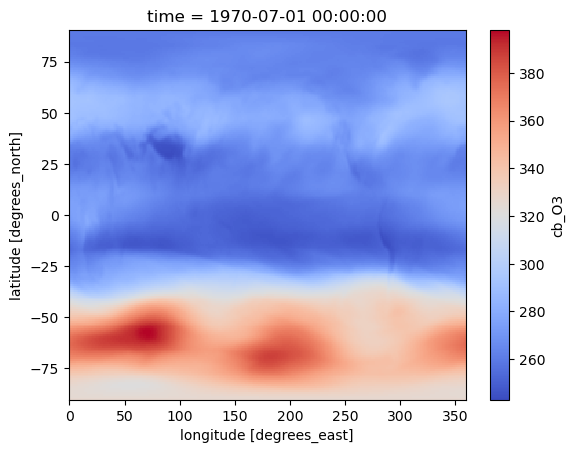

In [8]:
do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1970, 7, 1,0,0,0)).plot(cmap = 'coolwarm')

- select the nearest time. Here from 1st April 1950

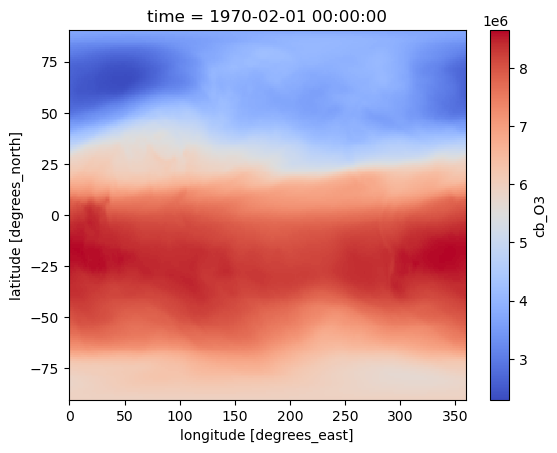

In [70]:
do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1850, 4, 1), method='nearest').plot(x = 'lon',cmap='coolwarm')

### Find what level the ozone layer is

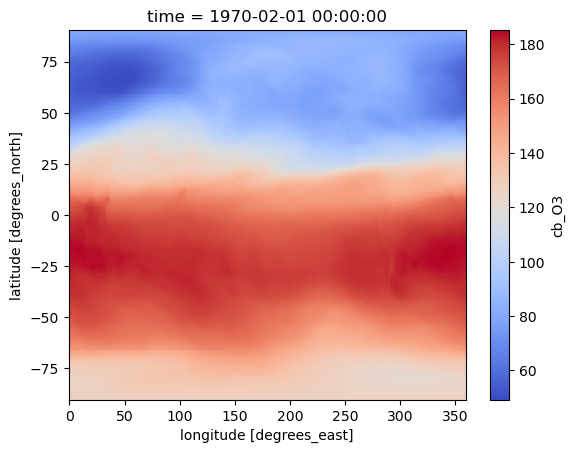

In [10]:
do['cb_O3'].sel(time=cftime.DatetimeNoLeap(1970, 2, 1, 0,0,0)).plot(cmap = 'coolwarm')

# Customize plot

### Set the size of the figure and add coastlines

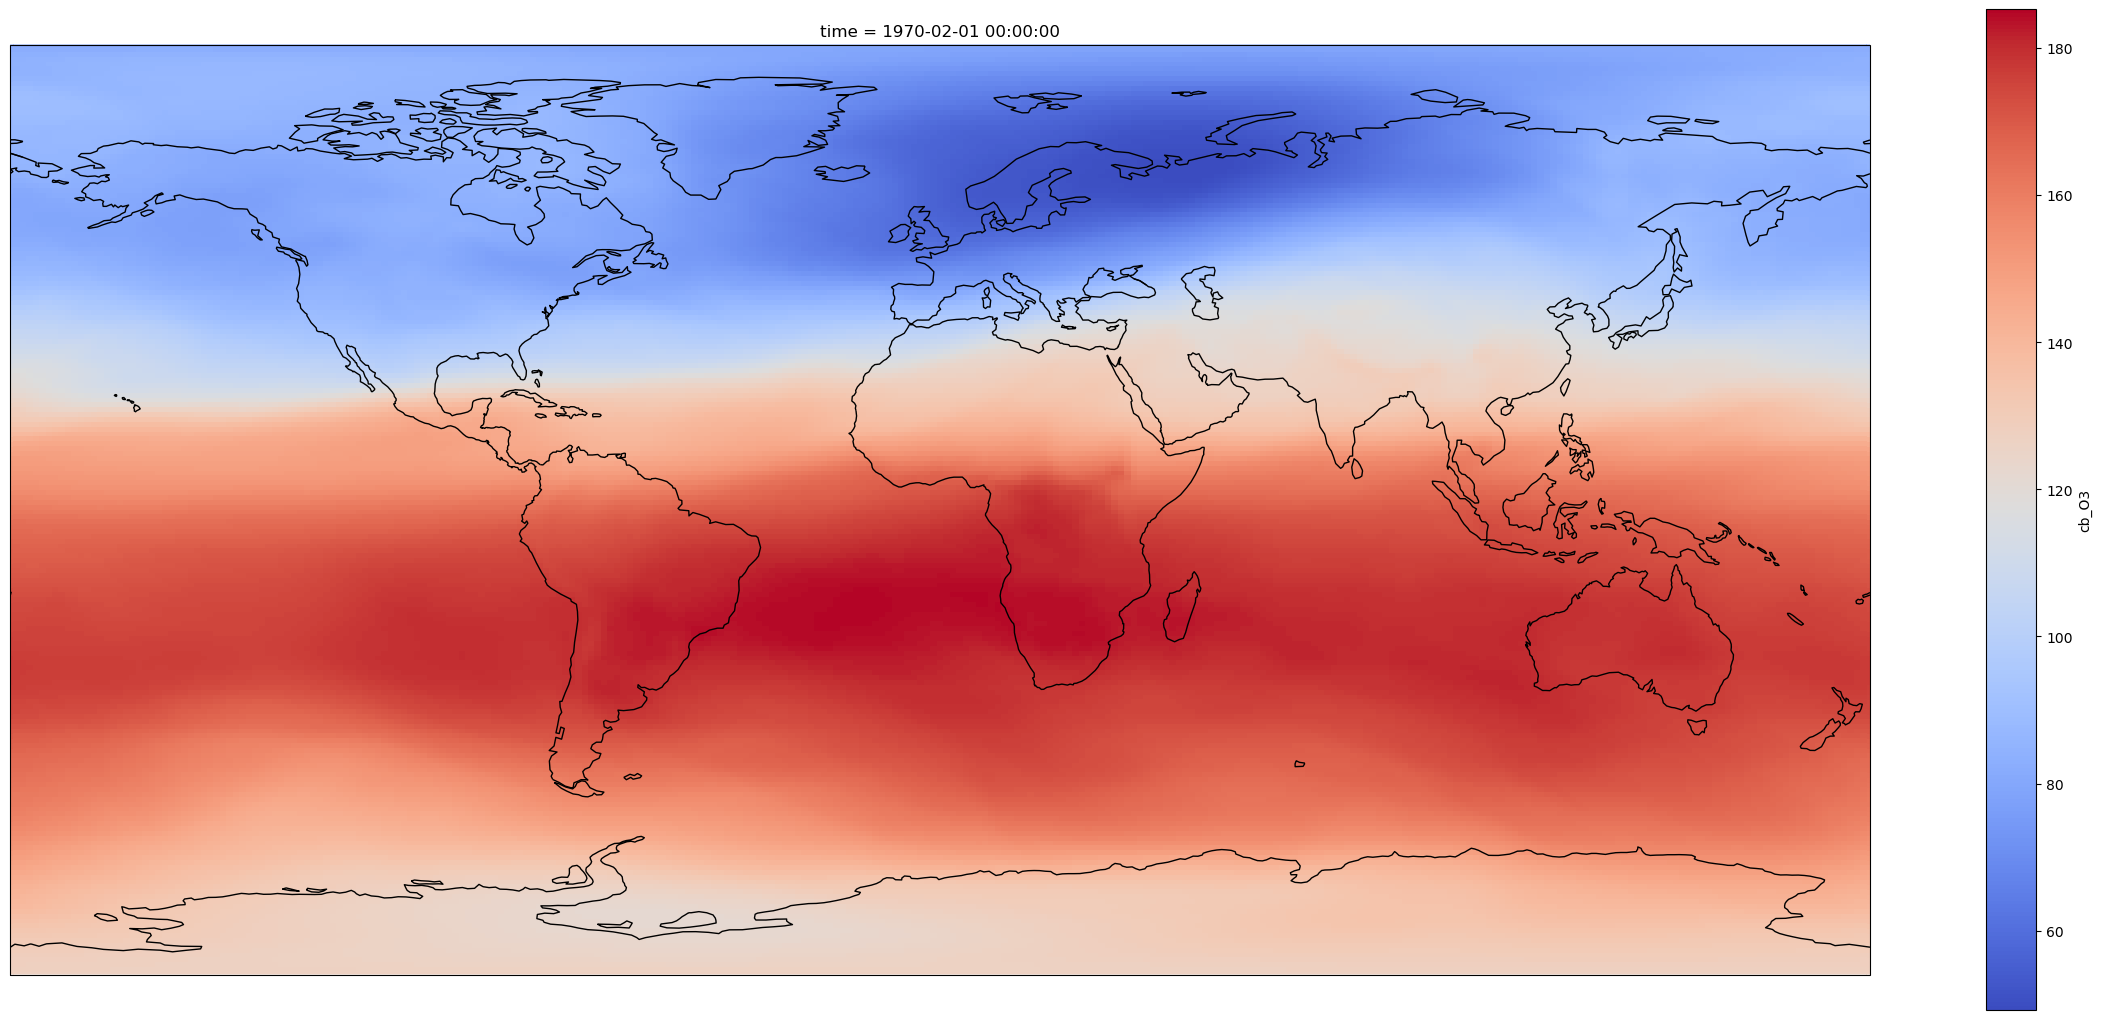

In [11]:
fig = plt.figure(1, figsize=[30,13])

# Set the projection to use for plotting
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()

# Pass ax as an argument when plotting. Here we assume data is in the same coordinate reference system than the projection chosen for plotting
# isel allows to select by indices instead of the time values
do['cb_O3'].isel(time=0).squeeze().plot.pcolormesh(ax=ax, cmap='coolwarm')

### Change plotting projection

Text(0.5, 1.0, 'August 1970')

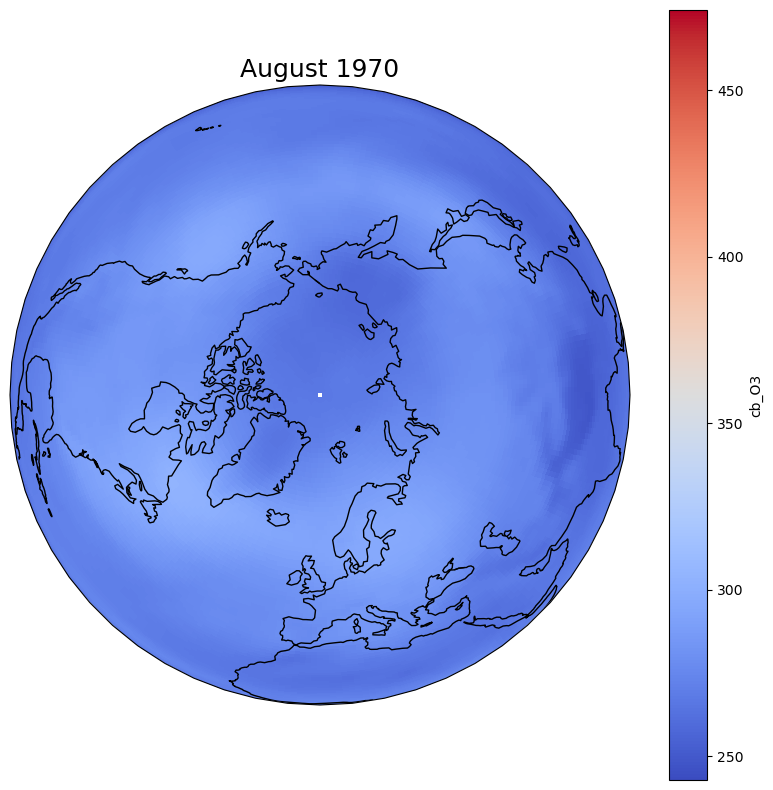

In [12]:
fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

### Choose the extent of values
- Fix your minimum and maximum values in your plot and
- Use extend so values below the minimum and max

Text(0.5, 1.0, 'August 1970')

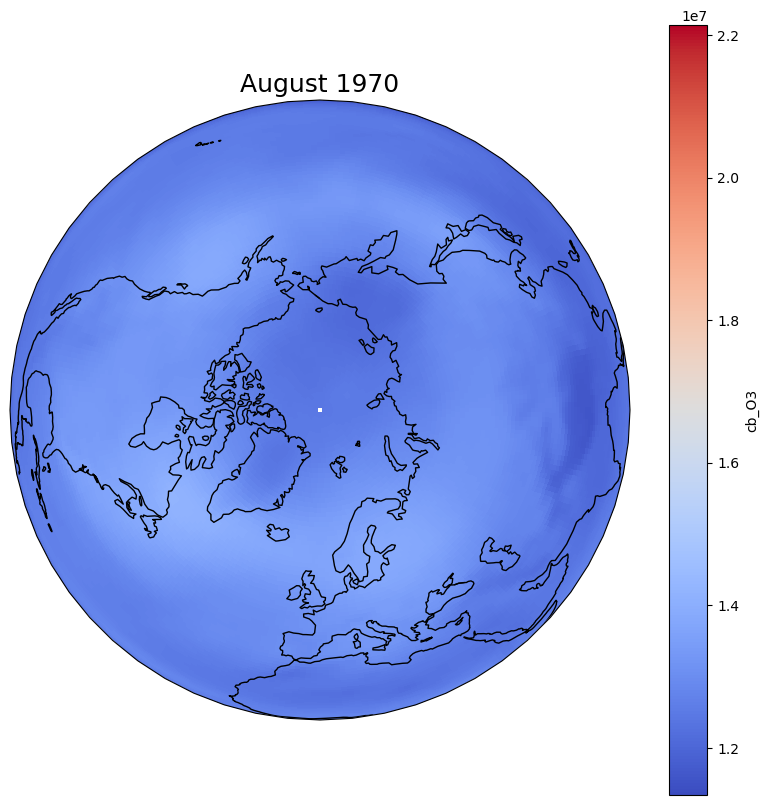

In [63]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# Fix extent
minval = do['cb_O3'].min()
maxval = do['cb_O3'].max()

# pass extent with vmin and vmax parameters
do['cb_O3'].isel(time=6).squeeze().plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title(do.time.values[6].strftime("%B %Y"), fontsize=18)

# Multiplots
### Faceting

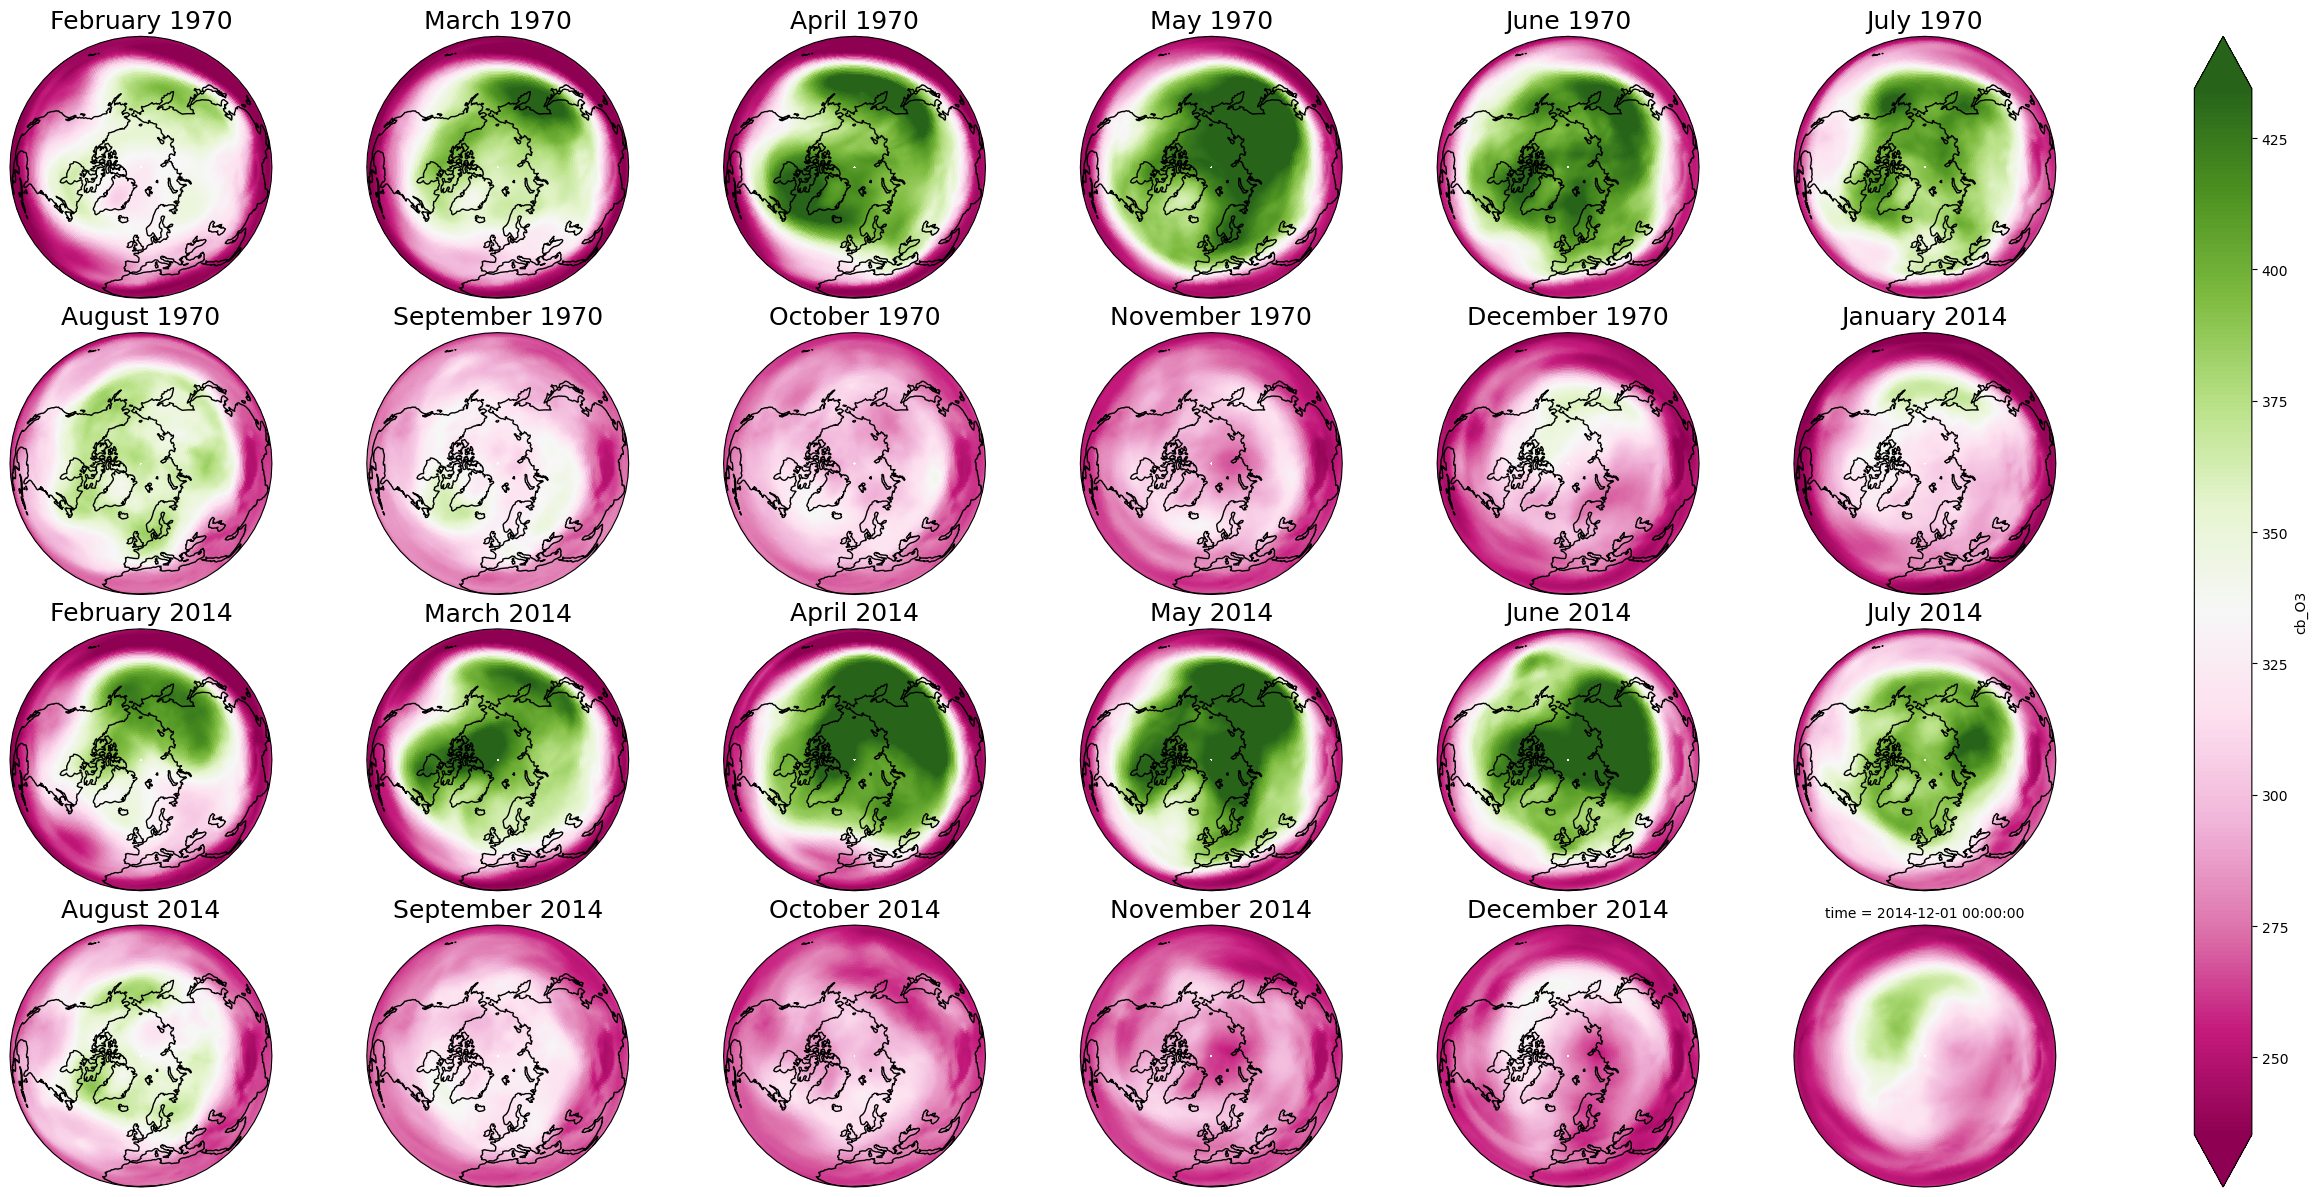

In [13]:
proj_plot = ccrs.Orthographic(0, 90)

p = do['cb_O3'].sel(time = do.time.dt.year.isin([1991, 2014])).squeeze().plot(x='lon', y='lat', 
                                                                 transform=ccrs.PlateCarree(),
                                                                 aspect=do.dims["lon"] / do.dims["lat"],  # for a sensible figsize
                                                                 subplot_kws={"projection": proj_plot},
                                                                 col='time', col_wrap=6, robust=True, cmap='PiYG')
# We have to set the map's options on all four axes
for ax,i in zip(p.axes.flat,  do.time.sel(time = do.time.dt.year.isin([1970, 2014])).values):
    ax.coastlines()
    ax.set_title(i.strftime("%B %Y"), fontsize=18)

### Combine plots with different projections

Text(0, 0.5, 'K')

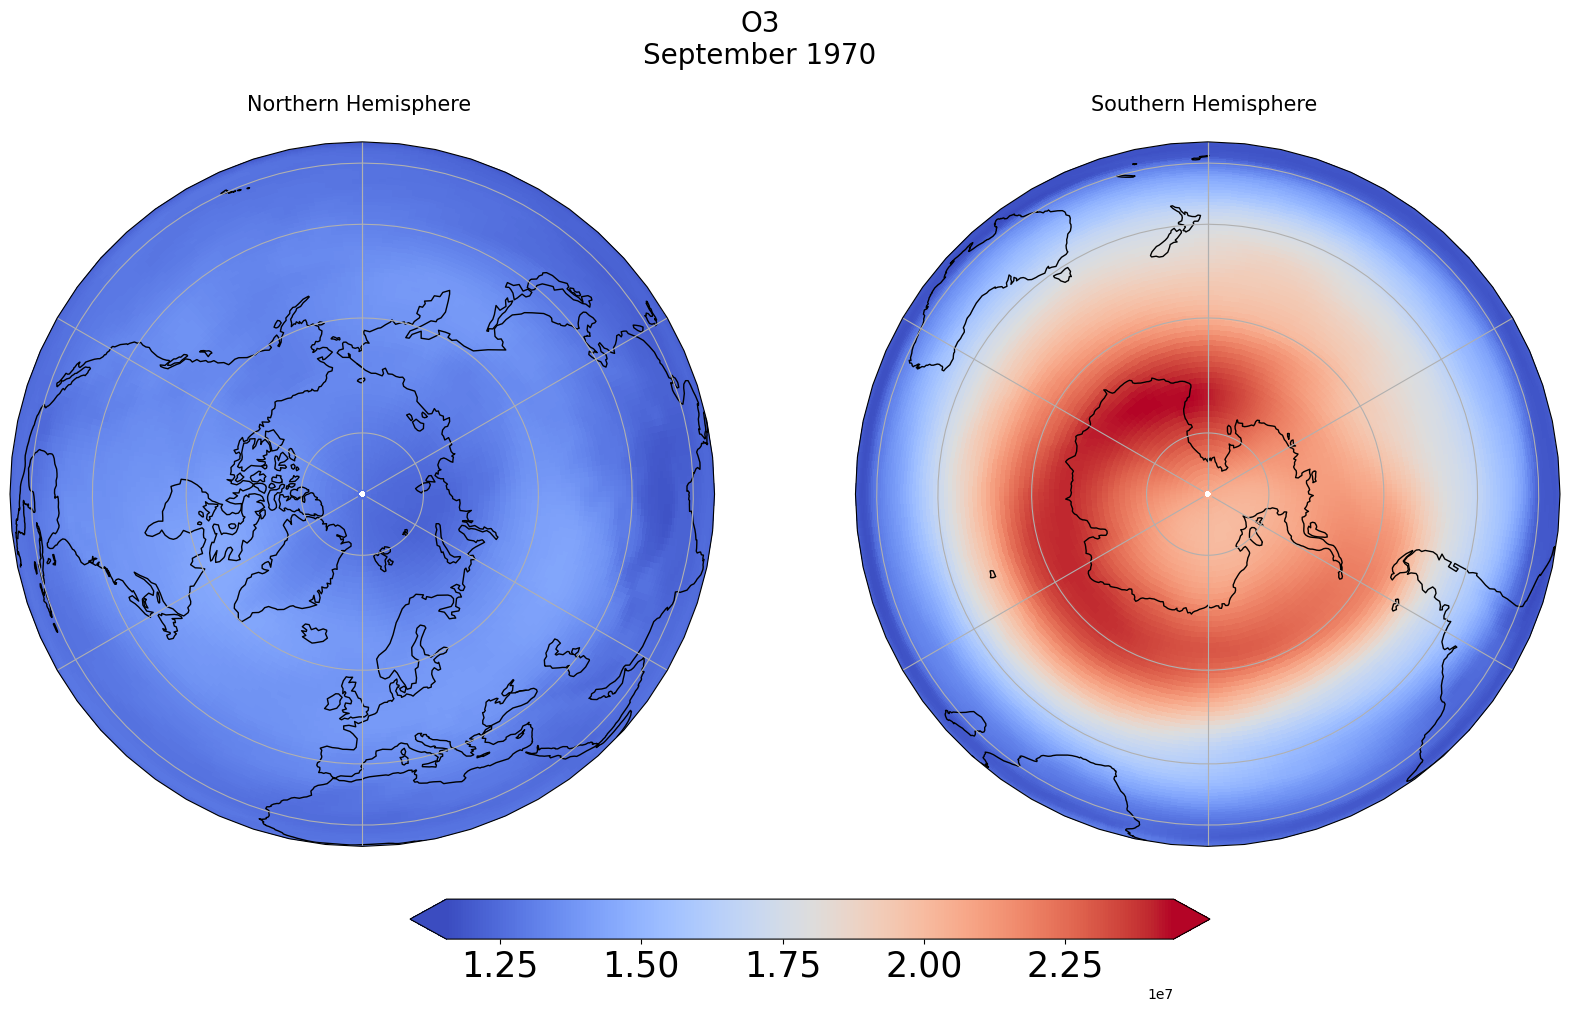

In [65]:
fig = plt.figure(1, figsize=[20,10])

# Fix extent
minval = do['cb_O3'].min()
maxval = do['cb_O3'].max()

# Plot 1 for Northern Hemisphere subplot argument (nrows, ncols, nplot)
# here 1 row, 2 columns and 1st plot
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# Plot 2 for Southern Hemisphere
# 2nd plot 
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

tsel = 7
for ax,t in zip([ax1, ax2], ["Northern", "Southern"]):
    map = do['cb_O3'].isel(time=tsel).squeeze().plot(ax=ax, 
                                           transform=ccrs.PlateCarree(), 
                                           cmap='coolwarm', 
                                           add_colorbar=False)
    ax.set_title(t + " Hemisphere \n" , fontsize=15)
    ax.coastlines()
    ax.gridlines()

# Title for both plots
fig.suptitle('O3\n' + do.time.values[tsel].strftime("%B %Y"), fontsize=20)


cb_ax = fig.add_axes([0.325, 0.05, 0.4, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, extend='both', orientation='horizontal', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=25)
cbar.ax.set_ylabel('K', fontsize=25)

### Time series


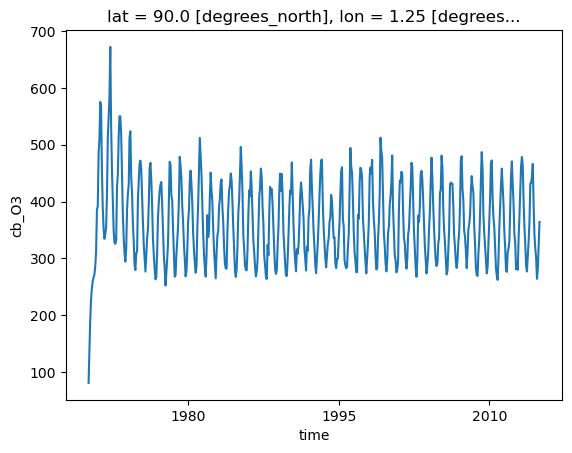

In [9]:
do['cb_O3'].sel(lon=1, lat=90, method='nearest').plot(x='time')

### Sulfate


In [24]:
s4path = 's3://escience2022/Zhihong/NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14/cb_SULFATE.NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14.cam.h0.197001-201412.nc'

In [25]:
du = xr.open_dataset(s3.open(s4path))
du

<xarray.Dataset>
Dimensions:     (lat: 192, lon: 288, lev: 32, ilev: 33, time: 540, nbnd: 2)
Coordinates:
  * lat         (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon         (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev         (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev        (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time        (time) object 1970-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    hyam        (lev) float64 ...
    hybm        (lev) float64 ...
    P0          float64 ...
    hyai        (ilev) float64 ...
    hybi        (ilev) float64 ...
    date        (time) int32 ...
    time_bnds   (time, nbnd) object ...
    PS          (time, lat, lon) float32 ...
    cb_SULFATE  (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              NFHISTnorpddmsbc_tropstratchem_f09_mg17_20220105_test14
    logname:           olivie
    host:              
    initial_file:      NHISTfrc2_f09_tn14_20191025.cam.i.1970-01-01-00000.nc
    topography_file:   /cluster/shared/noresm/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1
    history:           Fri Oct 28 13:16:38 2022: ncrcat /scratch/olivie/cmip6...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [26]:
du.time.values;

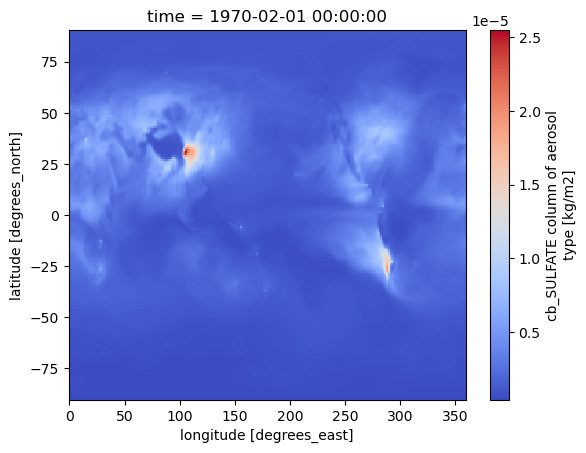

In [29]:
du['cb_SULFATE'].sel(time=cftime.DatetimeNoLeap(1970, 2, 1,0,0,0)).plot(cmap = 'coolwarm')